<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_ml/ml11_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image

from sklearn.datasets import fetch_openml  # 오픈 소스로 공개된 ML 데이터 셋을 다운로드
from sklearn.linear_model import LogisticRegression

# matplotlib.image 모듈

In [2]:
img = image.imread('spring.jpg')

`matplotlib.image.imread(file_name)`:

*   이미지 파일 file_name 읽어서 numpy.ndarray를 생성
*   흑백 이미지: (height, width) shape의 2차원 배열
*   RGB 형식 이미지: (height, width, 3) shape의 3차원 배열
*   RGBA 형식 이미지: (height, width, 4) shape의 3차원 배열

In [3]:
type(img)

numpy.ndarray

In [4]:
img.shape  #> (height, width, 3)

(1200, 2000, 3)

In [5]:
img[:, :, 0]
# 이미지의 Red 값: 0 ~ 255 (8 bits)

array([[198, 195, 220, ..., 199, 191, 128],
       [205, 214, 192, ..., 202, 159, 168],
       [189, 192, 191, ..., 188, 174, 161],
       ...,
       [ 19,  17,  19, ...,  84,  94,  95],
       [ 25,  17,  21, ...,  81,  92,  90],
       [ 29,  12,  13, ...,  80,  95,  90]], dtype=uint8)

`matplotlib.pyplot.imshow(array)':

*   numpy.ndarray로 변환된 이미지 (배열) array을 시각화

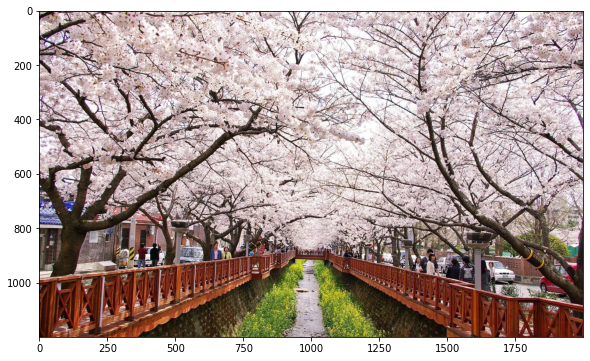

In [10]:
plt.figure(figsize=(10, 6))  # figsize=(width, height)
plt.imshow(img)
# plt.axis('off')
plt.show()

`matplotlib.pyplot.imsave(file_name, array)`

`matplotlib.image.imsave(file_name, array)`

*   배열 array를 이미지 파일 file_name로 저장.

In [11]:
plt.imsave('spring_copy.jpg', img)

In [12]:
image.imsave('sprint_copy2.jpg', img)

## numpy 배열 저장/로드

`numpy.save(file_name, array)`
>   numpy 배열 array를 파일 file_name으로 저장.

`numpy.load(file_name)`
>   파일 file_name을 읽어서 numpy 배열을 생성.

In [14]:
np.save('spring.npy', img)  # ndarry를 파일에 저장

In [15]:
arr = np.load('spring.npy')  # 파일에 저장된 ndarray를 읽어서 리턴.
arr.shape

(1200, 2000, 3)

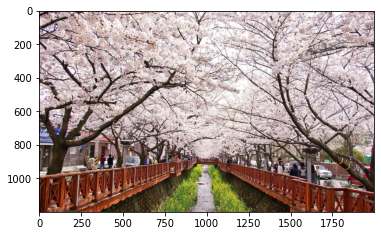

In [16]:
plt.imshow(arr)
plt.show()

In [22]:
img.shape

(1200, 2000, 3)

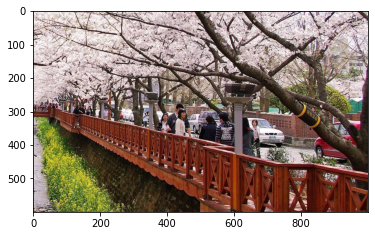

In [18]:
img_crop = img[600:, 1000:, :]  # 이미지 일부 잘라내기
plt.imshow(img_crop)
plt.show()

In [19]:
image.imsave('crop.jpg', img_crop)  # 배열을 이미지 파일로 저장

In [20]:
np.save('crop.npy', img_crop)  # ndarray를 파일에 저장

In [23]:
red = img[:, :, 0]
red.shape

(1200, 2000)

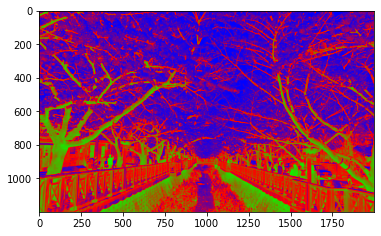

In [26]:
plt.imshow(red, cmap=plt.cm.brg_r)
plt.show()

# MNIST 데이터 셋

In [29]:
mnist = fetch_openml(name='mnist_784')

In [34]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [35]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [36]:
X, y = mnist['data'], mnist['target']

In [37]:
X.shape  # 28x28(=784) 크기의 숫자 손글씨 이미지 70,000개 데이터

(70000, 784)

In [38]:
y.shape  # 70,000개 이미지의 클래스(0, 1, 2, ..., 9)

(70000,)

In [39]:
y[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

## 손글씨 이미지 시각화

In [41]:
image_0 = X[0].reshape((28, 28))
image_0.shape

(28, 28)

In [44]:
image_0

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

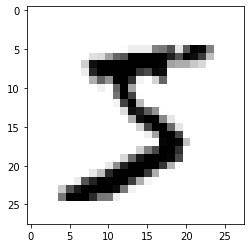

In [45]:
plt.imshow(image_0, cmap=plt.cm.binary)
# cmap='gray': 0(black) ~ 255(white)
# cmap='binary': 0(white) ~ 255(black) 

plt.show()

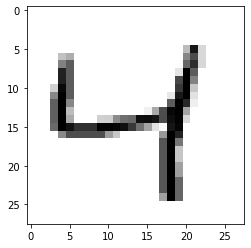

In [46]:
plt.imshow(X[2].reshape((28, 28)), cmap='binary')
plt.show()

100개 숫자 이미지 시각화

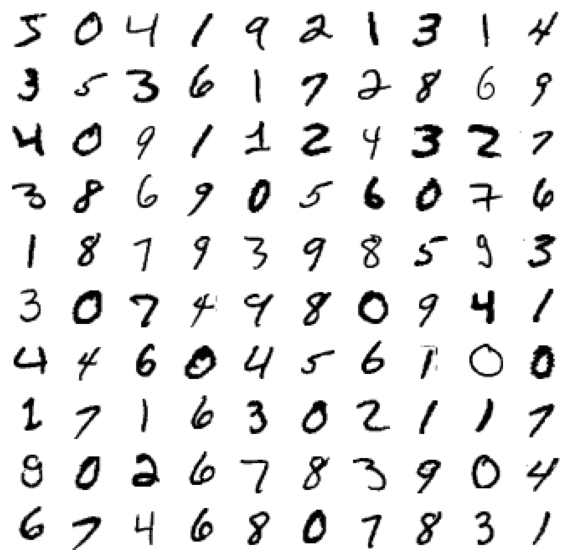

In [51]:
# 100개 subplot 생성
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))

# row 10개 반복
for i in range(10):
    # column 10개 반복
    for j in range(10):
        # MNIST 1차원 배열을 (28, 28) 모양의 2차원 배열로 변환.
        img_arr = X[i * 10 + j].reshape((28, 28))
        axes[i, j].imshow(img_arr, cmap=plt.cm.binary)
        axes[i, j].axis('off')

plt.show()

# Train/Test 분리

In [54]:
# 타겟: 문자열들의 배열 -> 숫자들의 배열 변환
y = y.astype(np.int8)
y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int8)

In [55]:
# 데이터가 random하게 섞여있는 상태이기 때문에, 첫 60,000개를 훈련 셋, 뒤 10,000개를 테스트 셋으로.
num_train = 60_000
X_train, X_test = X[:num_train], X[num_train:]
y_train, y_test = y[:num_train], y[num_train:]

In [57]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [59]:
X_test.shape, y_test.shape

((10000, 784), (10000,))

# 모델 훈련

## LogisticRegression

In [61]:
# 모델 생성
log_clf = LogisticRegression(random_state=42, n_jobs=-1)

In [63]:
# 모델 훈련
log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [64]:
# 훈련 셋 정확도
log_clf.score(X_train, y_train)

0.9339166666666666